In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pandas as pd
import yfinance as yf

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score

In [31]:
folder_path = 'data/new_label_dataset/'

In [32]:
start_date = "2017-01-01"
end_date = "2022-12-31"

In [33]:
stock_symbol = 'AUBANK.NS'

In [34]:
aubank_data = pd.read_csv(f'{folder_path}/{stock_symbol}.csv')

In [35]:
aubank_data.shape

(1322, 30)

In [36]:
aubank_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,...,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR,Target
0,2017-08-29,265.500000,279.399994,265.500000,272.399994,270.861786,1649802,268.661109,275.953571,269.747170,...,257.109623,46.315878,15.579860,27.511465,0.182936,-7916212.0,-22.486667,-43.905643,11.294367,0.00
1,2017-08-30,275.000000,278.875000,274.225006,275.424988,273.869659,712294,269.036109,275.057142,270.882733,...,258.701281,44.629755,14.862239,26.244265,0.162639,-7203918.0,24.239067,-22.460356,10.919995,0.53
2,2017-08-31,274.899994,278.225006,273.000000,274.725006,273.173615,580208,269.366665,274.077381,271.651188,...,260.456179,43.268357,14.290231,26.136532,0.141817,-7784126.0,30.892280,-16.461228,10.480352,0.50
3,2017-09-01,275.500000,285.000000,273.774994,276.149994,274.590576,1765988,270.174998,273.277380,272.550949,...,262.568087,40.724434,18.056729,23.999530,0.124248,-6018138.0,96.957914,-36.875025,10.537509,0.51
4,2017-09-04,277.875000,282.149994,271.024994,278.500000,276.927307,1182770,271.108331,272.682142,273.740759,...,262.630387,38.798966,16.607432,24.057285,0.144057,-4835368.0,88.353220,-27.083333,10.582363,0.52
5,2017-09-05,280.049988,288.250000,276.575012,286.575012,284.956726,1989224,273.533332,273.030952,276.307610,...,261.445038,36.017884,19.571585,22.056518,0.186246,-2846144.0,177.568397,-6.146744,10.665375,0.57
6,2017-09-06,284.000000,289.000000,281.799988,283.924988,282.321686,1157354,275.899997,273.353571,277.831085,...,260.914892,33.384987,19.092384,20.902004,0.166896,-4003498.0,160.379632,-18.125044,10.403286,0.48
7,2017-09-07,285.625000,288.000000,277.500000,279.350006,277.772491,815452,277.336110,273.527380,278.134870,...,261.370567,31.613485,17.642099,22.425050,0.090621,-4818950.0,117.262176,-34.464264,10.410570,0.47
8,2017-09-08,280.500000,282.750000,275.000000,277.174988,275.609802,831916,278.247220,273.194047,277.942893,...,261.367084,30.339722,16.637531,22.984957,0.036877,-5650866.0,67.870040,-42.232186,10.210966,0.49
9,2017-09-11,279.375000,282.450012,275.500000,279.299988,277.722839,697004,279.013885,273.401188,278.214312,...,261.489833,29.181880,15.770295,21.786860,0.068276,-4953862.0,69.590690,-34.642901,9.967196,0.52


In [37]:
sample_data = aubank_data['Close'].values
print(len(sample_data))

1322


In [38]:
reduced_data = sample_data[:30]

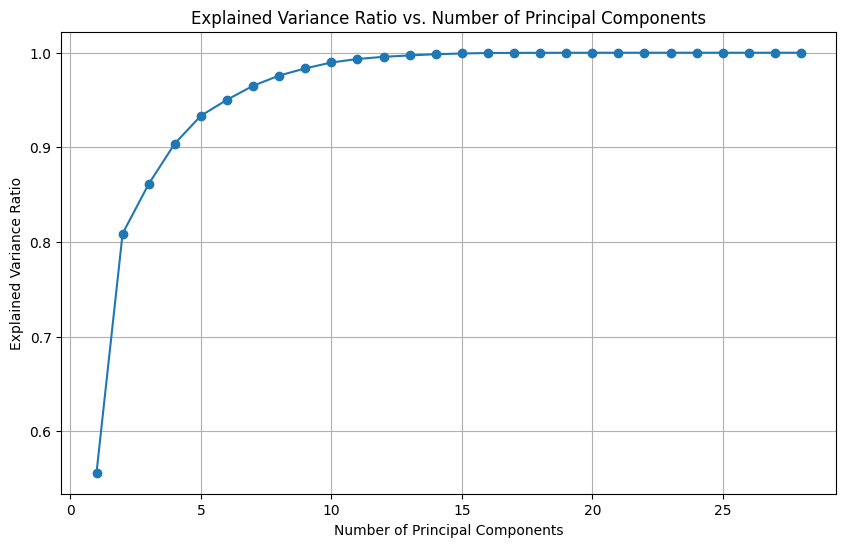

          PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0    -4.761518  0.705379  0.989621  1.359001 -0.305807 -0.465252  0.390279   
1    -4.694228 -0.083276  1.162377  0.803311 -0.829710 -0.323020  0.587892   
2    -4.684926 -0.433214  1.281650  0.487922 -0.951935 -0.198866  1.024008   
3    -4.525571 -0.787203  1.380134  0.382077 -0.251228 -0.098943  0.711269   
4    -4.511782 -0.996872  1.247951  0.219934 -0.488568 -0.243139  0.885079   
...        ...       ...       ...       ...       ...       ...       ...   
1317  6.026426  1.666605 -1.695933  0.104410 -0.866054  0.205457 -0.169348   
1318  6.158789  1.443082 -1.609573 -0.137105 -0.763912  0.140249 -0.563147   
1319  6.165389  1.189305 -1.633271 -0.373952 -0.999439 -0.025968 -0.429824   
1320  6.334288  0.900088 -1.094988 -0.529822 -0.072367  0.112278 -0.083472   
1321  6.134773  1.499525 -1.619684 -0.470815 -0.722066 -0.198355  0.216221   

          PC 8      PC 9     PC 10     PC 11     PC 12     PC 1

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Selecting the features for PCA
features = aubank_data.drop(columns=['Date', 'Target'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Hyperparameter testing for the number of principal components
explained_variance_ratios = []
num_features = range(1, len(features.columns) + 1)

for n in num_features:
    pca = PCA(n_components=n)
    pca.fit(scaled_features)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(num_features, explained_variance_ratios, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Performing PCA with the optimal number of components (you can choose based on the plot)
optimal_components = 13  # Change this based on the plot
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC {i+1}' for i in range(optimal_components)])

# Adding the date and target columns to the PCA DataFrame
pca_df['Date'] = aubank_data['Date']
pca_df['Target'] = aubank_data['Target']

print(pca_df)

In [40]:
pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,Date,Target
0,-4.761518,0.705379,0.989621,1.359001,-0.305807,-0.465252,0.390279,0.834717,-0.367757,0.743379,0.079532,0.059056,-0.103470,2017-08-29,0.00
1,-4.694228,-0.083276,1.162377,0.803311,-0.829710,-0.323020,0.587892,0.787388,-0.010206,0.961482,0.045206,-0.017042,-0.068746,2017-08-30,0.53
2,-4.684926,-0.433214,1.281650,0.487922,-0.951935,-0.198866,1.024008,0.658220,-0.055787,0.891507,0.013281,-0.027874,-0.036422,2017-08-31,0.50
3,-4.525571,-0.787203,1.380134,0.382077,-0.251228,-0.098943,0.711269,0.525808,-0.468123,0.170234,0.538297,0.026149,0.003017,2017-09-01,0.51
4,-4.511782,-0.996872,1.247951,0.219934,-0.488568,-0.243139,0.885079,0.491716,-0.241914,0.346426,0.376298,-0.015686,0.054790,2017-09-04,0.52


In [51]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import torch.nn as nn
import torch.optim as optim

# Prepare the data
X = pca_df.drop(columns=['Date', 'Target']).values
y = pca_df['Target'].values

# Determine the split index
split_index = int(0.8 * len(pca_df))

# Get the indices
train_indices = pca_df.index[:split_index]
test_indices = pca_df.index[split_index:]

# Split the data manually
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 50
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        y_batch = y_batch.unsqueeze(1)
        
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        outputs = model(X_batch)
        y_pred.extend(outputs.squeeze().tolist())
        y_true.extend(y_batch.tolist())

# Calculate accuracy or other metrics as needed
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse:.4f}')




Epoch [1/50], Loss: 0.0457
Epoch [2/50], Loss: 0.0000
Epoch [3/50], Loss: 0.0554
Epoch [4/50], Loss: 0.0113
Epoch [5/50], Loss: 0.0022
Epoch [6/50], Loss: 0.0001
Epoch [7/50], Loss: 0.0046
Epoch [8/50], Loss: 0.0021
Epoch [9/50], Loss: 0.0000
Epoch [10/50], Loss: 0.0006
Epoch [11/50], Loss: 0.0315
Epoch [12/50], Loss: 0.0133
Epoch [13/50], Loss: 0.0001
Epoch [14/50], Loss: 0.0058
Epoch [15/50], Loss: 0.0003
Epoch [16/50], Loss: 0.0000
Epoch [17/50], Loss: 0.0006
Epoch [18/50], Loss: 0.0002
Epoch [19/50], Loss: 0.0006
Epoch [20/50], Loss: 0.0000
Epoch [21/50], Loss: 0.0000
Epoch [22/50], Loss: 0.0002
Epoch [23/50], Loss: 0.0038
Epoch [24/50], Loss: 0.0001
Epoch [25/50], Loss: 0.0027
Epoch [26/50], Loss: 0.0002
Epoch [27/50], Loss: 0.0005
Epoch [28/50], Loss: 0.0206
Epoch [29/50], Loss: 0.0003
Epoch [30/50], Loss: 0.0005
Epoch [31/50], Loss: 0.0000
Epoch [32/50], Loss: 0.0000
Epoch [33/50], Loss: 0.0029
Epoch [34/50], Loss: 0.0572
Epoch [35/50], Loss: 0.0138
Epoch [36/50], Loss: 0.0006
E

In [52]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.0505


In [53]:
# Extract the dates corresponding to the test set using the test_indices
test_dates = pca_df.loc[test_indices, 'Date'].values

# Print the date, predicted, and actual values
for date, pred, actual in zip(test_dates, y_pred, y_true):
    print(f"Date: {date}, Predicted: {pred:.4f}, Actual: {actual:.4f}")

Date: 2021-12-09, Predicted: 0.5579, Actual: 0.5200
Date: 2021-12-10, Predicted: 0.5186, Actual: 0.4800
Date: 2021-12-13, Predicted: 0.4996, Actual: 0.5000
Date: 2021-12-14, Predicted: 0.5130, Actual: 0.5400
Date: 2021-12-15, Predicted: 0.5228, Actual: 0.4600
Date: 2021-12-16, Predicted: 0.4885, Actual: 0.4700
Date: 2021-12-17, Predicted: 0.3587, Actual: 0.3800
Date: 2021-12-20, Predicted: 0.2552, Actual: 0.1700
Date: 2021-12-21, Predicted: 0.4537, Actual: 0.6500
Date: 2021-12-22, Predicted: 0.4824, Actual: 0.4700
Date: 2021-12-23, Predicted: 0.5239, Actual: 0.5700
Date: 2021-12-24, Predicted: 0.4874, Actual: 0.4500
Date: 2021-12-27, Predicted: 0.4758, Actual: 0.4300
Date: 2021-12-28, Predicted: 0.4570, Actual: 0.4400
Date: 2021-12-29, Predicted: 0.5069, Actual: 0.6000
Date: 2021-12-30, Predicted: 0.5677, Actual: 0.6300
Date: 2021-12-31, Predicted: 0.5135, Actual: 0.4800
Date: 2022-01-03, Predicted: 0.5502, Actual: 0.6200
Date: 2022-01-04, Predicted: 0.5921, Actual: 0.6300
Date: 2022-0

In [54]:
import pandas as pd

# Extract the dates corresponding to the test set
test_dates = pca_df.loc[test_indices, 'Date'].values

# Create a DataFrame with Date, Predicted, and Actual columns
results_df = pd.DataFrame({
    'Date': test_dates,
    'Predicted': y_pred,
    'Actual': y_true
})

# Print the DataFrame (optional)
print(results_df)


           Date  Predicted  Actual
0    2021-12-09   0.557949    0.52
1    2021-12-10   0.518588    0.48
2    2021-12-13   0.499627    0.50
3    2021-12-14   0.512957    0.54
4    2021-12-15   0.522843    0.46
..          ...        ...     ...
260  2022-12-26   0.493535    0.59
261  2022-12-27   0.564519    0.57
262  2022-12-28   0.547955    0.50
263  2022-12-29   0.568950    0.52
264  2022-12-30   0.489269    0.43

[265 rows x 3 columns]


In [55]:
folder_path = 'data/new_label_dataset/'

In [56]:
# Bank Nifty Stock Symbols
bank_nifty_stock_symbols = [
    "HDFCBANK.NS",
    "AXISBANK.NS",
    "ICICIBANK.NS",
    "HDFCBANK.NS",
    "KOTAKBANK.NS",
    "SBIN.NS",
    "INDUSINDBK.NS",
    "BANDHANBNK.NS",
    "FEDERALBNK.NS",
    "PNB.NS",
    "IDFCFIRSTB.NS",
    "BANKBARODA.NS",
    "AUBANK.NS"
]

In [57]:
def get_stock_maximums(folder_path):
    stock_maximums = {}

    for stock_symbol in bank_nifty_stock_symbols:
        stock_df = pd.read_csv(f"{folder_path}{stock_symbol}.csv")
        maximum_rise_in_price_in_consecutive_days = 0
        maximum_fall_in_price_in_consecutive_days = 0

        for i in range(1, stock_df.shape[0]):
            price_change = stock_df['Close'][i] - stock_df['Close'][i-1]
            if price_change > 0:
                maximum_rise_in_price_in_consecutive_days = max(maximum_rise_in_price_in_consecutive_days, price_change)
            else:
                maximum_fall_in_price_in_consecutive_days = max(maximum_fall_in_price_in_consecutive_days, abs(price_change))

        stock_maximums[stock_symbol] = (maximum_rise_in_price_in_consecutive_days, maximum_fall_in_price_in_consecutive_days)

    return stock_maximums

In [58]:
stock_maximums = get_stock_maximums(folder_path)

In [59]:
stock_maximums

{'HDFCBANK.NS': (150.800048828125, 111.29998779296875),
 'AXISBANK.NS': (74.550048828125, 119.5),
 'ICICIBANK.NS': (82.4000244140625, 61.70001220703125),
 'KOTAKBANK.NS': (170.75, 164.0999755859375),
 'SBIN.NS': (70.44999694824219, 32.5),
 'INDUSINDBK.NS': (137.3499755859375, 143.3500366210937),
 'BANDHANBNK.NS': (76.85000610351562, 113.0499877929687),
 'FEDERALBNK.NS': (14.150001525878906, 12.80000305175782),
 'PNB.NS': (63.850006103515625, 17.600006103515625),
 'IDFCFIRSTB.NS': (5.69999694824218, 6.200000762939453),
 'BANKBARODA.NS': (45.00000000000003, 22.150001525878906),
 'AUBANK.NS': (60.20001220703125, 82.07501220703125)}

In [60]:
aubank_data = stock_maximums['AUBANK.NS']

In [63]:
aubank_max_rise, aubank_max_fall = aubank_data

In [64]:
print(y_test)

[0.52 0.48 0.5  0.54 0.46 0.47 0.38 0.17 0.65 0.47 0.57 0.45 0.43 0.44
 0.6  0.63 0.48 0.62 0.63 0.81 0.49 0.72 0.56 0.77 0.5  0.55 0.36 0.55
 0.45 0.52 0.47 0.51 0.42 0.57 0.62 0.49 0.66 0.66 0.71 0.45 0.39 0.49
 0.49 0.64 0.55 0.32 0.3  0.72 0.41 0.48 0.47 0.5  0.5  0.55 0.21 0.73
 0.41 0.52 0.34 0.4  0.32 0.64 0.69 0.57 0.63 0.28 0.7  0.54 0.45 0.56
 0.58 0.66 0.52 0.39 0.54 0.5  0.46 0.68 0.67 0.59 0.53 0.59 0.61 0.61
 0.53 0.52 0.51 0.43 0.67 0.5  0.56 0.31 0.49 0.69 0.34 0.69 0.44 0.44
 0.37 0.6  0.4  0.39 0.45 0.55 0.39 0.73 0.55 0.54 0.4  0.43 0.71 0.62
 0.45 0.39 0.64 0.47 0.45 0.36 0.64 0.56 0.38 0.52 0.51 0.46 0.4  0.44
 0.41 0.62 0.7  0.48 0.49 0.44 0.49 0.42 0.6  0.53 0.58 0.49 0.34 0.47
 0.42 0.41 0.46 0.71 0.53 0.48 0.52 0.45 0.46 0.4  0.47 0.56 0.57 0.59
 0.58 0.47 0.5  0.51 0.5  0.57 0.51 0.61 0.61 0.45 0.72 0.59 0.52 0.47
 0.5  0.42 0.57 0.55 0.49 0.46 0.49 0.58 0.54 0.48 0.46 0.45 0.5  0.62
 0.48 0.56 0.49 0.44 0.57 0.53 0.57 0.62 0.52 0.53 0.36 0.47 0.61 0.5
 0.48 0

In [65]:
print(y_pred)

[0.5579490065574646, 0.5185880064964294, 0.49962684512138367, 0.5129569172859192, 0.5228425860404968, 0.48849183320999146, 0.35865598917007446, 0.2552224099636078, 0.45373690128326416, 0.4823775589466095, 0.5239291191101074, 0.4874245524406433, 0.47579434514045715, 0.4569541811943054, 0.5069143772125244, 0.5676755309104919, 0.5135343074798584, 0.550167441368103, 0.5921030044555664, 0.9197142720222473, 0.6214523911476135, 0.7281132936477661, 0.639847457408905, 0.742924153804779, 0.5696269869804382, 0.5622241497039795, 0.43629324436187744, 0.48918241262435913, 0.4917677342891693, 0.5141768455505371, 0.5039182305335999, 0.5201194286346436, 0.42507824301719666, 0.5039195418357849, 0.6230568289756775, 0.5345081090927124, 0.7234990000724792, 0.7109856009483337, 0.6798354983329773, 0.5000755786895752, 0.4039601981639862, 0.4496374726295471, 0.49166926741600037, 0.5870965123176575, 0.6035493016242981, 0.43991100788116455, 0.33802127838134766, 0.5049538612365723, 0.4440816342830658, 0.473543643

In [68]:
aubank_data = pd.DataFrame(aubank_data)

In [74]:
old_close = 580.099

In [78]:
predicted_prices = []

In [79]:
for i in range(0, len(y_pred)):
    current_val = y_pred[i]

    if(current_val > 0.5):
        new_value = old_close +  (((current_val - 0.5)*2) * aubank_max_rise) 

    else:
        new_value = old_close -  (((0.5 - current_val)*2) * aubank_max_fall)

    
    predicted_prices.append(new_value)
    old_close = new_value

In [83]:
aubank_data_new = pd.read_csv(f'{folder_path}/AUBANK.NS.csv')

In [84]:
print(aubank_data_new.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_9',
       'SMA_21', 'EMA_9', 'EMA_21', 'DEMA_9', 'DEMA_21', 'MACD_Line',
       'MACD_Signal_Line', 'RSI_14', 'Stoch_Oscillator_K',
       'Stoch_Oscillator_D', 'BB_middle', 'BB_upper', 'BB_lower', 'ADX',
       'ADX+DI', 'ADX-DI', 'CMF', 'OBV', 'CCI', 'Williams_%R', 'ATR',
       'Target'],
      dtype='object')


In [85]:
# get the close prices for the test data
close_prices = aubank_data_new.loc[test_indices, 'Close'].values

In [86]:
print(close_prices)

[582.57501221 579.97497559 580.15002441 584.45001221 578.25
 573.77502441 554.5        499.75       518.29998779 513.54998779
 522.42498779 513.875      502.6000061  493.04998779 505.57501221
 521.67498779 518.25       532.65002441 547.95001221 584.67498779
 583.52502441 610.5        617.17498779 649.40002441 648.65002441
 654.20001221 631.20001221 636.95001221 629.15002441 632.07501221
 627.02502441 628.34997559 614.75       623.22497559 637.84997559
 635.77502441 654.77502441 673.5        698.40002441 690.42498779
 671.95001221 669.5        667.17498779 683.45001221 688.97497559
 660.15002441 626.875      653.54998779 638.22497559 634.82501221
 630.54998779 631.02502441 630.5        636.72497559 589.77502441
 617.34997559 601.79998779 604.67498779 579.07501221 562.52502441
 532.45001221 549.17498779 572.54998779 581.04998779 596.52502441
 560.54998779 584.75       589.42498779 581.70001221 588.875
 598.02502441 617.875      620.72497559 603.         607.375
 607.82501221 601.09997559

In [87]:
print(predicted_prices)

[587.0760618042895, 589.3140582402683, 589.2528048578332, 590.8128180153889, 593.563065932345, 591.674000072804, 568.4723772442902, 528.292129863801, 520.6980410799787, 517.8053169508293, 520.6863834758932, 518.622123452007, 514.6487646158547, 507.5827924079766, 508.4152835931726, 516.5634191670305, 518.1929501180329, 524.2331112835435, 535.3223152686022, 585.8559238670113, 600.4787947263302, 627.9436408506934, 644.7812781369702, 674.029352185831, 682.4124431181534, 689.9042322616568, 679.4467667683183, 677.6710595365056, 676.3197329190897, 678.0266254694887, 678.4983805213941, 680.9207602202022, 668.6223519823305, 669.094264915051, 683.9103101280397, 688.0650873052854, 714.9743723705304, 740.3770438757255, 762.029242265531, 762.0383419416011, 746.2734061254977, 738.0063960280839, 736.6389060710334, 747.125328280459, 759.5926667240836, 749.7290572007604, 723.1402460925, 723.7366911063272, 714.5576900086979, 710.2148785174157, 709.3578056923633, 711.6581291683013, 719.0991237477482, 729

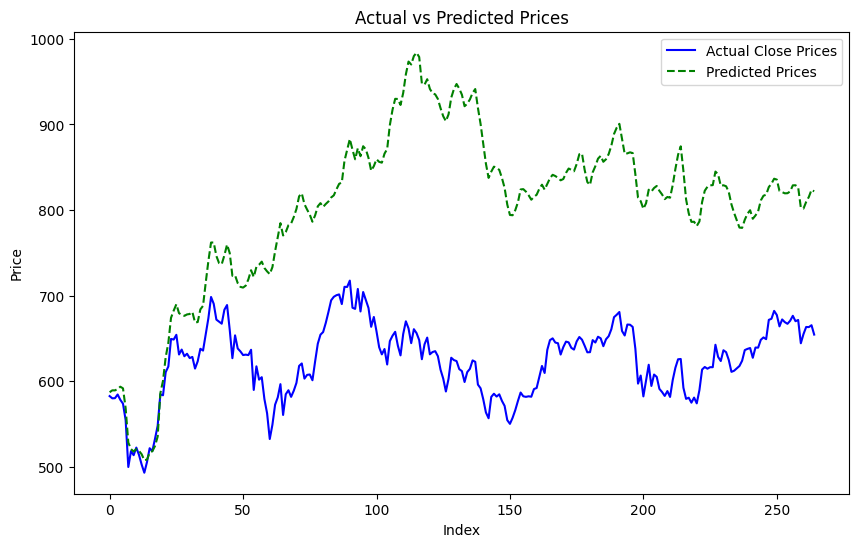

In [88]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot actual close prices
plt.plot(close_prices, label='Actual Close Prices', color='blue', linestyle='-')

# Plot predicted prices
plt.plot(predicted_prices, label='Predicted Prices', color='green', linestyle='--')

# Add title and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')

# Add a legend to differentiate the two lines
plt.legend()

# Display the plot
plt.show()

In [75]:
print(y_pred)

[0.5579490065574646, 0.5185880064964294, 0.49962684512138367, 0.5129569172859192, 0.5228425860404968, 0.48849183320999146, 0.35865598917007446, 0.2552224099636078, 0.45373690128326416, 0.4823775589466095, 0.5239291191101074, 0.4874245524406433, 0.47579434514045715, 0.4569541811943054, 0.5069143772125244, 0.5676755309104919, 0.5135343074798584, 0.550167441368103, 0.5921030044555664, 0.9197142720222473, 0.6214523911476135, 0.7281132936477661, 0.639847457408905, 0.742924153804779, 0.5696269869804382, 0.5622241497039795, 0.43629324436187744, 0.48918241262435913, 0.4917677342891693, 0.5141768455505371, 0.5039182305335999, 0.5201194286346436, 0.42507824301719666, 0.5039195418357849, 0.6230568289756775, 0.5345081090927124, 0.7234990000724792, 0.7109856009483337, 0.6798354983329773, 0.5000755786895752, 0.4039601981639862, 0.4496374726295471, 0.49166926741600037, 0.5870965123176575, 0.6035493016242981, 0.43991100788116455, 0.33802127838134766, 0.5049538612365723, 0.4440816342830658, 0.473543643

In [76]:
print(y_test)

[0.52 0.48 0.5  0.54 0.46 0.47 0.38 0.17 0.65 0.47 0.57 0.45 0.43 0.44
 0.6  0.63 0.48 0.62 0.63 0.81 0.49 0.72 0.56 0.77 0.5  0.55 0.36 0.55
 0.45 0.52 0.47 0.51 0.42 0.57 0.62 0.49 0.66 0.66 0.71 0.45 0.39 0.49
 0.49 0.64 0.55 0.32 0.3  0.72 0.41 0.48 0.47 0.5  0.5  0.55 0.21 0.73
 0.41 0.52 0.34 0.4  0.32 0.64 0.69 0.57 0.63 0.28 0.7  0.54 0.45 0.56
 0.58 0.66 0.52 0.39 0.54 0.5  0.46 0.68 0.67 0.59 0.53 0.59 0.61 0.61
 0.53 0.52 0.51 0.43 0.67 0.5  0.56 0.31 0.49 0.69 0.34 0.69 0.44 0.44
 0.37 0.6  0.4  0.39 0.45 0.55 0.39 0.73 0.55 0.54 0.4  0.43 0.71 0.62
 0.45 0.39 0.64 0.47 0.45 0.36 0.64 0.56 0.38 0.52 0.51 0.46 0.4  0.44
 0.41 0.62 0.7  0.48 0.49 0.44 0.49 0.42 0.6  0.53 0.58 0.49 0.34 0.47
 0.42 0.41 0.46 0.71 0.53 0.48 0.52 0.45 0.46 0.4  0.47 0.56 0.57 0.59
 0.58 0.47 0.5  0.51 0.5  0.57 0.51 0.61 0.61 0.45 0.72 0.59 0.52 0.47
 0.5  0.42 0.57 0.55 0.49 0.46 0.49 0.58 0.54 0.48 0.46 0.45 0.5  0.62
 0.48 0.56 0.49 0.44 0.57 0.53 0.57 0.62 0.52 0.53 0.36 0.47 0.61 0.5
 0.48 0